In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#### Read data

In [3]:
salary_data = pd.read_csv('data/Dataset.csv')

salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
salary_data.shape

(375, 6)

#### Rename coloumns

In [6]:
salary_data.columns=['Age', 'Gender', 'Degree', 'Job_Title', 'Experience_years', 'Salary']

salary_data.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [7]:
salary_data.dtypes

Age                 float64
Gender               object
Degree               object
Job_Title            object
Experience_years    float64
Salary              float64
dtype: object

#### Check and drop duplicate records

In [8]:

duplicate_rows = salary_data.duplicated()

# Check if there are any duplicate rows
has_duplicates = duplicate_rows.any()

# Print result
print(f"Are there any duplicate rows? {has_duplicates}")

# If you want to see the count of duplicate rows
duplicate_count = duplicate_rows.sum()
print(f"Number of duplicate rows: {duplicate_count}")


Are there any duplicate rows? True
Number of duplicate rows: 50


In [9]:
salary_data1 = salary_data.drop_duplicates(keep = 'first')

salary_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 0 to 371
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               324 non-null    float64
 1   Gender            324 non-null    object 
 2   Degree            324 non-null    object 
 3   Job_Title         324 non-null    object 
 4   Experience_years  324 non-null    float64
 5   Salary            324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.8+ KB


In [10]:
salary_data1.shape

(325, 6)

#### Missing values

In [11]:
salary_data1.isnull().sum()

Age                 1
Gender              1
Degree              1
Job_Title           1
Experience_years    1
Salary              1
dtype: int64

In [12]:
salary_data1.dropna(how = 'any', inplace=True)

C:\Users\Eric\AppData\Local\Temp\ipykernel_13180\3411772538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data1.dropna(how = 'any', inplace=True)


In [13]:
salary_data1.shape

(324, 6)

In [14]:
salary_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Data Exploration and Visualization

#### Statistics of numeric columns

In [15]:
salary_data1.describe()

,Age,Experience_years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


#### correlation matrix among numerical features

In [16]:
corr = salary_data1[['Age','Experience_years','Salary']].corr()
corr

,Age,Experience_years,Salary
Age,1.000000,0.979192,0.916543
Experience_years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

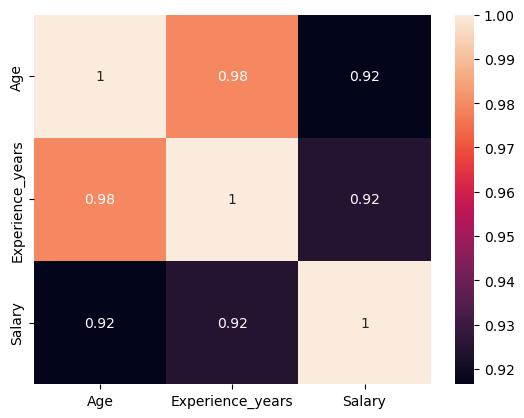

In [17]:
sns.heatmap(corr, annot = True)

#### Bar chart, Box plot, histogram

In [18]:
salary_data1['Degree'].value_counts()

Degree
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

In [19]:
salary_data1['Job_Title'].value_counts()

Job_Title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: count, Length: 174, dtype: int64

<Axes: >

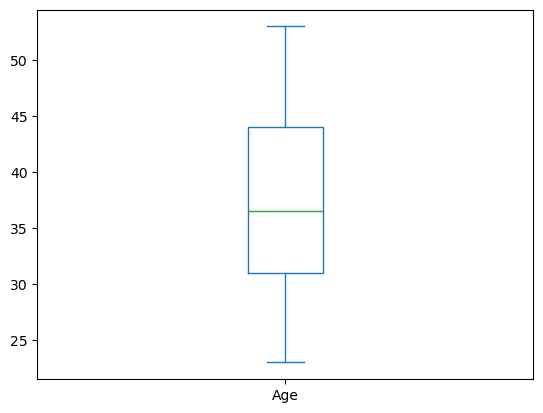

In [20]:
salary_data1['Age'].plot(kind='box')

## Feature Enginneering

#### Label encoding

In [21]:
from sklearn.preprocessing import LabelEncoder 
Label_Encoder = LabelEncoder()

In [22]:
salary_data1['Gender_Encode'] = Label_Encoder.fit_transform(salary_data1['Gender'])
salary_data1['Degree_Encode'] = Label_Encoder.fit_transform(salary_data1['Degree'])
salary_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(salary_data1['Job_Title'])


C:\Users\Eric\AppData\Local\Temp\ipykernel_13180\3403234300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data1['Gender_Encode'] = Label_Encoder.fit_transform(salary_data1['Gender'])
C:\Users\Eric\AppData\Local\Temp\ipykernel_13180\3403234300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data1['Degree_Encode'] = Label_Encoder.fit_transform(salary_data1['Degree'])
C:\Users\Eric\AppData\Local\Temp\ipykernel_13180\3403234300.py:3: SettingWithCopyWarning: 
A value is trying to be set o

In [23]:
salary_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


#### Feature scaling

In [24]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()


In [25]:
salary_data1['Age_scaled'] = std_scaler.fit_transform(salary_data1[['Age']])
salary_data1['Experience_years_scaled'] = std_scaler.fit_transform(salary_data1[['Experience_years']])

C:\Users\Eric\AppData\Local\Temp\ipykernel_13180\3158104943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data1['Age_scaled'] = std_scaler.fit_transform(salary_data1[['Age']])
C:\Users\Eric\AppData\Local\Temp\ipykernel_13180\3158104943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_data1['Experience_years_scaled'] = std_scaler.fit_transform(salary_data1[['Experience_years']])


In [26]:
salary_data1.head()

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


#### Dependent and independent features

In [33]:
x = salary_data1[['Age_scaled','Gender_Encode','Job_Title_Encode','Experience_years_scaled']]

y = salary_data1['Salary']


#### splitting the data into training and testing

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [41]:
x_test.shape

(65, 4)

In [42]:
x_train.shape

(259, 4)

## Model Development

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
Linear_regression_model = LinearRegression()

#### Model Training

In [47]:
Linear_regression_model.fit(x_train, y_train)

LinearRegression()

#### Model predictions

In [48]:
y_pred_lr = Linear_regression_model.predict(x_test)
y_pred_lr 

array([112725.72430506, 123420.58158154,  52420.58905639, 105517.37337023,
        97720.59515314,  91703.24407099,  50202.61795163,  60734.17492348,
       169723.83701835,  30439.08882134,  41344.69773576, 118644.54901885,
        98836.48056815, 139449.29551341,  92387.0484791 , 173917.97801342,
       110358.1798692 , 124713.18429337,  46148.25699723,  47879.16644926,
        82845.32385511,  64615.2050532 ,  65798.94089527,  30952.61082324,
       197291.43644865,  80875.68967945, 136632.55662499, 163342.32810809,
       174163.23845172,  34500.50462904, 104333.56477644, 167101.00162414,
        96261.54289417, 144048.53802756, 131788.60088351,  32262.29890842,
        95461.91758704,  99499.71230674,  88481.64089312,  40538.32755668,
        98493.00374283,  54696.14283854, 118062.65745124,  56611.34357933,
        37534.66727563,  49522.20001565, 143507.35292129,  43086.25767052,
       147358.01709105,  73062.03524631, 178037.73286678,  43987.48583681,
        61921.36998941, 1

#### create a dataframe for y predict and actual

In [51]:
df = pd.DataFrame({'y_actual' :y_test, 'y_predicted': y_pred_lr})

df.head(10)

,y_actual,y_predicted
132,100000.0,112725.724305
108,100000.0,123420.581582
137,50000.0,52420.589056
9,110000.0,105517.373370
181,105000.0,97720.595153
126,95000.0,91703.244071
221,45000.0,50202.617952
198,55000.0,60734.174923
279,180000.0,169723.837018
144,40000.0,30439.088821


In [53]:
df['Error'] = df['y_actual'] - df['y_predicted']

df.head()

,y_actual,y_predicted,Error
132,100000.0,112725.724305,-12725.724305
108,100000.0,123420.581582,-23420.581582
137,50000.0,52420.589056,-2420.589056
9,110000.0,105517.373370,4482.626630
181,105000.0,97720.595153,7279.404847
